In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():    
    tarball_path = Path("datasets/housing.tgz") # define path
    if not tarball_path.is_file():  # make "dataset" directory
        Path("datasets").mkdir(parents=True, exist_ok=True)

    url = "https://github.com/ageron/data/raw/main/housing.tgz" # datset url
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball: # housing.tgz open
            housing_tarball.extractall(path="datasets") # "dataset" dir에 파일들 추출
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [2]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# null값 확인
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


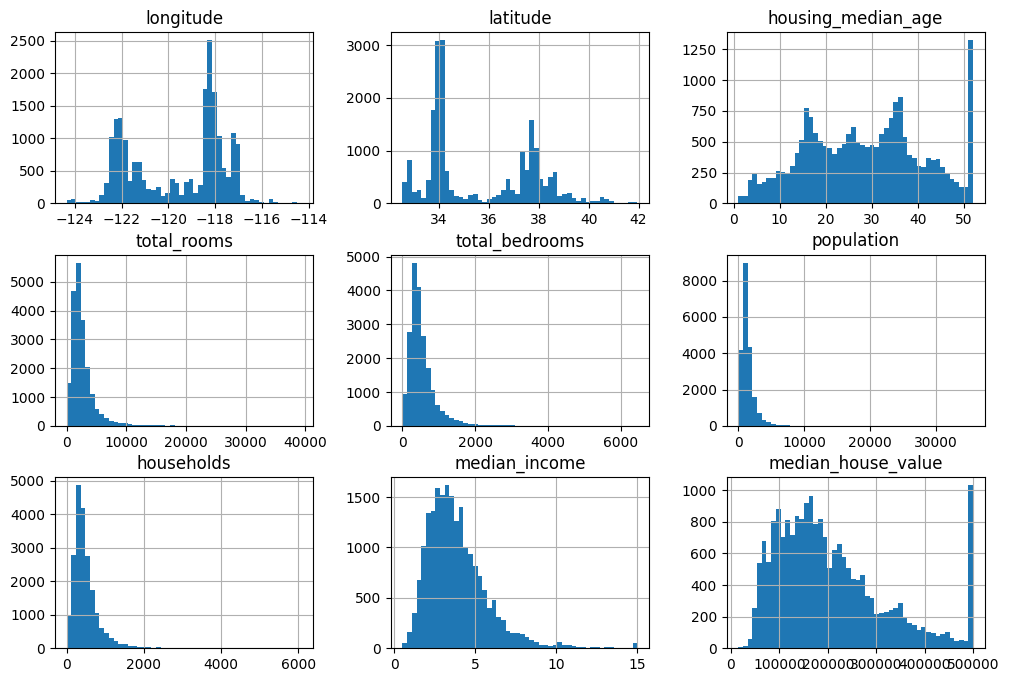

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

- median_income: scale 조정된 값(상/하한 설정됨: 0.5~15, 3->30,000달러)
- houseing_median_age, median_house_value: 최대/최솟값 한정됨
- median_house_value를 에측할 때, 50,000이 넘는 값을 예측 못할 것으로 예상됨
- faeture의 scale이 매우 다름 -> 스켈링링 필요해보임
- 많은 feature이 오른쪽 꼬리가 긴 형태, 이런 패턴은 모델이 패턴을 찾기 어렵게 함 -> 정규화 필요?

### Test data 생성

In [8]:
import numpy as np 
np.random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # data 개수만큼 무작위 배열 생성
    test_set_size = int(len(data) * test_ratio)    # test_data 개수 define
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(data=housing, test_ratio=0.2)
print(f'train: {len(train_set)}, test: {len(test_set)}')

train: 16512, test: 4128


##### 각 샘플마다 식별자의 해시값을 계산해, 해시 최대값의 20%보다 작거나 같은 샘플만 테스트 샘플로 보내는 방법
##### 유지보수 용이

In [10]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32   

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
housing_with_id = housing.reset_index() 
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [12]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

#### sklearn을 이용한 방법

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- 데이터가 충분히 크지 않다면,샘플링 편향이 생길 가능성 큼.
- ex) 전화번호부에서 1,000명을 랜덤으로 뽑을 대, 남/여 비율이 51/49라면, test set에서도 비슷한 비율을 유지해야 함

##### 편향을 고려한 방법

c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing f

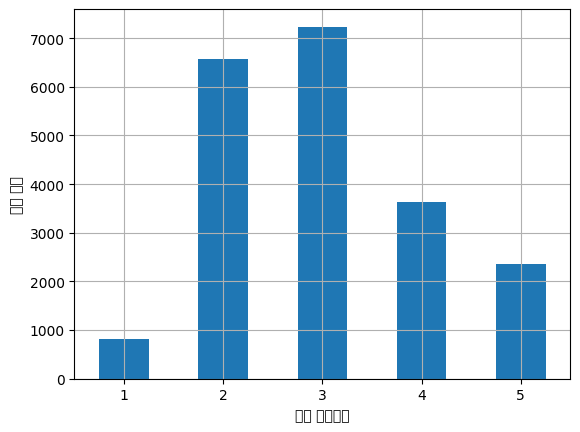

In [14]:
# 소득 카테고리 5개 생성 (1~5)
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# visualize
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()
# plt.rc("font", family="NanumBarunGothic")

In [15]:
# sklearn을 이용한 방법
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
start_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    start_train_set_n = housing.iloc[train_index]
    start_test_set_n = housing.iloc[test_index]
    start_splits.append([start_train_set_n, start_test_set_n])

In [16]:
start_train_set, start_test_set_n = start_splits[0]
start_splits[0]

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 13096    -122.42     37.80                52.0       3321.0          1115.0   
 14973    -118.38     34.14                40.0       1965.0           354.0   
 3785     -121.98     38.36                33.0       1083.0           217.0   
 14689    -117.11     33.75                17.0       4174.0           851.0   
 20507    -118.15     33.77                36.0       4366.0          1211.0   
 ...          ...       ...                 ...          ...             ...   
 14207    -118.40     33.86                41.0       2237.0           597.0   
 13105    -119.31     36.32                23.0       2945.0           592.0   
 19301    -117.06     32.59                13.0       3920.0           775.0   
 19121    -118.40     34.06                37.0       3781.0           873.0   
 19888    -122.41     37.66                44.0        431.0           195.0   
 
        population  households  median

In [17]:
# train_test_split()에서도 stratify 파라미터를 사용해 간편하게 사용 가능
start_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing["income_cat"],
                                                   random_state=42)

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

# 계층적 샘플링을 사용해 만든 test set은 전체 데이터셋에 있는 비율과 거의 같음

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [18]:
for set_ in (start_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 2.4 데이터 이해를 위한 탐색과 시각화

In [19]:
# 원본 데이터 보존을 하기 위한 복사사
housing = start_train_set.copy()

c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


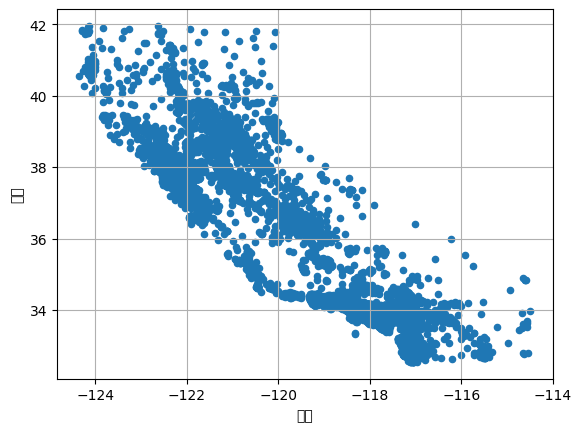

In [20]:
# 위,경도 데이터 시각화
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


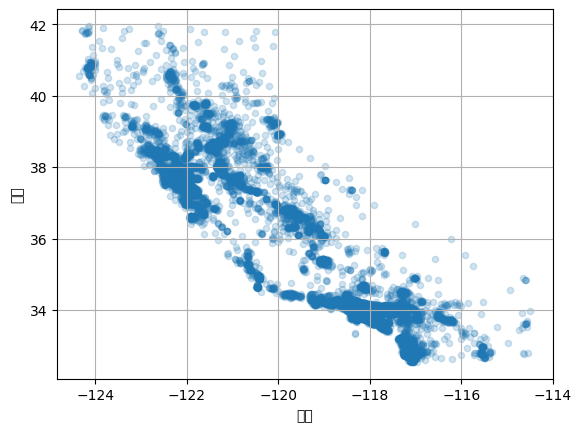

In [21]:
# alpha(투명도)값 조절을 통한 밀집도 고려 시각화
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

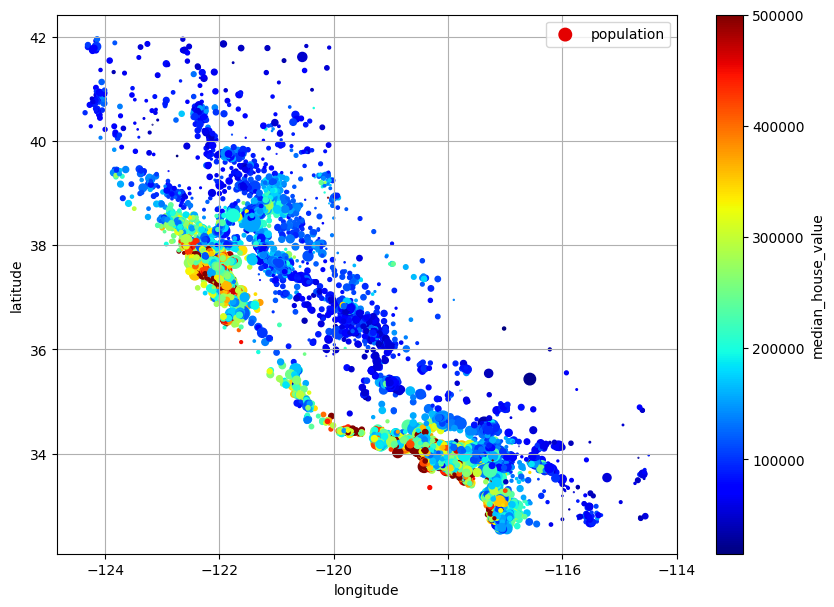

In [22]:
# 인구: 원의 반지름(s), 가격: 색상(c)
# 인구: 원의 반지름(s), 가격: 색상(c)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,  # 경도와 위도를 사용하여 산점도 그리기
                   s=housing["population"] / 100, label="population",  # 인구 수에 따라 원의 크기 설정
                   c="median_house_value", cmap="jet", colorbar=True,  # 주택 중간 가격에 따라 색상 설정
                   legend=True, sharex=False, figsize=(10, 7))
plt.show()

#### 2.4.2 상관관계 조사하기

In [23]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [24]:
print(corr_matrix["median_house_value"] .sort_values(ascending=False))
# 해석
# 중간소득이 높을수록 집값도 높음
# 위도가 높을수록 집값이 내려가는 경향 있음

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


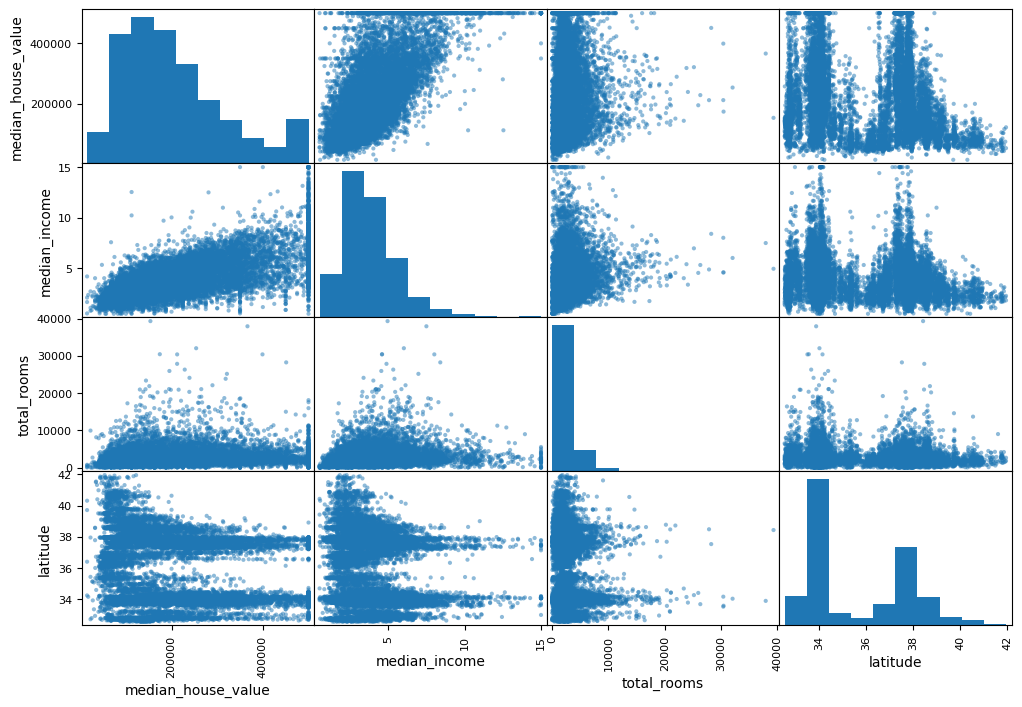

In [25]:
from pandas.plotting import scatter_matrix

# 상관관계가 높아보이는 feature들만 scatter visualize
attributes = ["median_house_value", "median_income", "total_rooms", "latitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [26]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'  # 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

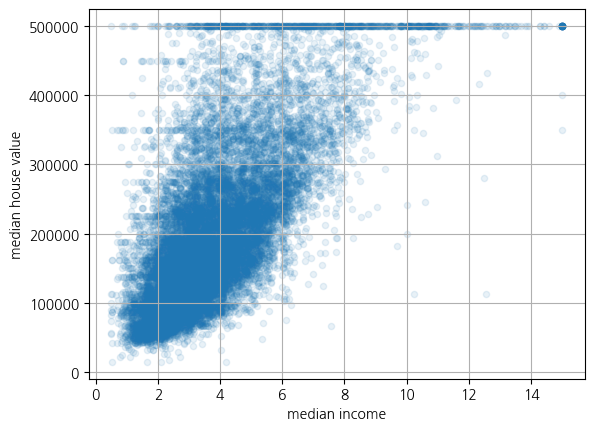

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                   alpha=0.1, grid=True)
plt.xlabel("median income")
plt.ylabel("median house value")
plt.show()
# 해석:
# 1. 상관관계가 매우 강함
# 2. 가격 한계값이 수평선으로 보임, 제거 대상

#### 2.4.3 특성 조합으로 실험하기

In [28]:
# print(housing.columns)
# housing.drop(columns=["rooms_for_house", "rooms_por_house"], inplace=True)
# print(housing.columns)

In [29]:
# 의미없는 특성 -> 파생변수 생성
# 특정 구역의 방 개수 -> 가구당 방 개수
# 특정 구역의 침실 개수 -> 가구당 침대 개수
# 가구당 인원(좋을까?)
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedroom_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_house"] = housing["population"] / housing["households"]
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedroom_ratio', 'population_per_house'],
      dtype='object')


In [30]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_house         0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedroom_ratio          -0.256397
Name: median_house_value, dtype: float64

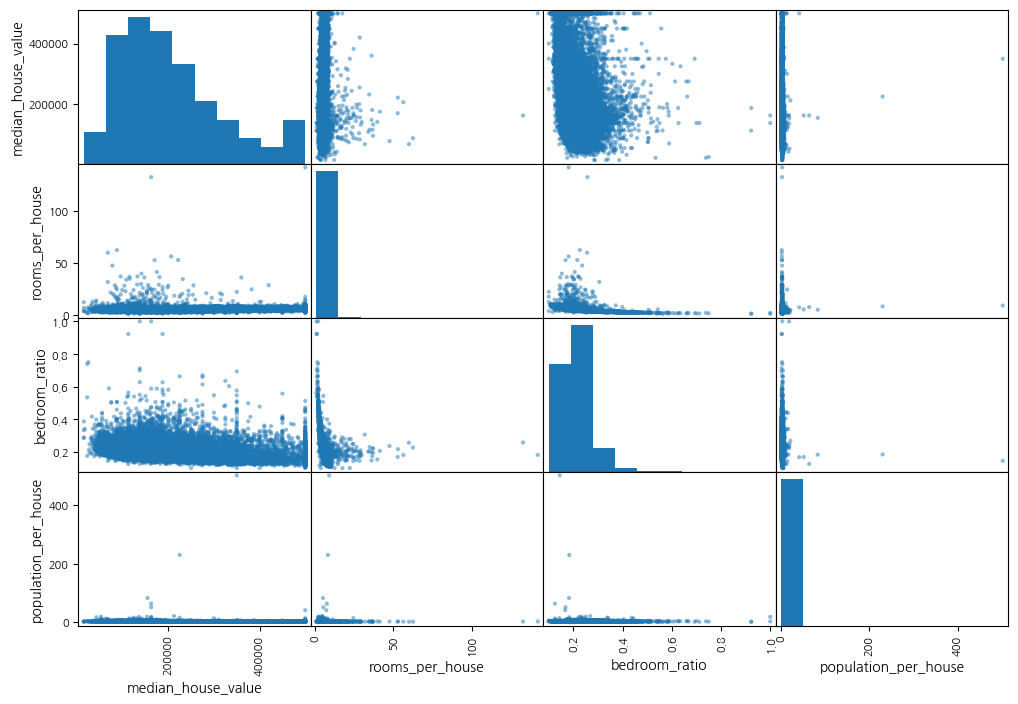

In [31]:
# 상관관계가 높아보이는 feature들만 scatter visualize
attributes = ["median_house_value", "rooms_per_house", "bedroom_ratio", "population_per_house"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

---

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [32]:
housing = start_train_set.drop("median_house_value", axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [33]:
housing_labels = start_train_set["median_house_value"].copy()
print(housing_labels)

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64


### 2.5.1  데이터 정제

In [34]:
# "total_bedrooms" 결측치 처리
print(housing["total_bedrooms"].isnull().sum())

168


In [35]:
# # option1 (결측치 삭제)
# housing.dropna(subset=["total_bedrooms"], inplace=True) 
# # option2 (column 삭제)
# housing.drop("total_bedroomns", axis=1, inplace=True)
# option3 (중간값으로 대체)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_45120\1916549393.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [36]:
# scikit-learn에 있는 SimpleImputer 사용
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  # SimpleImputer(중앙값) 객체 생성, strategy: {"most_frequent": 최빈값, "constatnt": 상수}
housing_num = housing.select_dtypes(include=[np.number])    # 수치형 feature 데이터 복사
# print(housing_num)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
# feature별 중앙값 확인
for i in range(len(housing_num.columns)):
    print(f"{housing_num.columns[i]:<20}: {imputer.statistics_[i]}")

longitude           : -118.51
latitude            : 34.26
housing_median_age  : 29.0
total_rooms         : 2125.0
total_bedrooms      : 434.0
population          : 1167.0
households          : 408.0
median_income       : 3.5385


In [38]:
X = imputer.transform(housing_num) # 결측치 중앙값으로 대체  
housing_tr = pd.DataFrame(data=X,   # numpy array -> dataframe
                          columns=housing_num.columns,
                          index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


### 2.5.2 텍스트와 범주형 특성 다루기

In [39]:
housing_cat = housing[["ocean_proximity"]]
# print(housing_cat)
print(housing_cat.value_counts())

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64


In [40]:
# 범주형(text) 데이터 인코딩
from sklearn.preprocessing import OrdinalEncoder

ordianl_encoder = OrdinalEncoder()  # encoder 객체 생성
housing_cat_encoded = ordianl_encoder.fit_transform(housing_cat)    # 인코딩 적용
print(housing_cat_encoded[:8])  # 인코딩 된 값 확인
print(ordianl_encoder.categories_)  # 기존 카테고리 확인
# 이런 방식은 다음과 같은 문제점이 있음: 모델이 카테고리 0과 1보다 0과 4가 더 가깝다고 판단(순서형 data엔 적합)

[[3.]
 [0.]
 [1.]
 [1.]
 [4.]
 [1.]
 [0.]
 [3.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [41]:
# One-Hot Encoding(원-핫 인코딩)
# 원-핫 인코딩 장점: 어떤 카테고리로 훈련되었는지 기억됨
# 새로운 특성: Dummy(더미) data

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()   # sparse=False: numpy 배열로 반환
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)   # 인코딩 적용
print(type(housing_cat_1hot), '\n')  # 희소 행렬(scipy) 출력
print(housing_cat_1hot.toarray(), '\n')   # to.array()로 scipy matrix -> numpy array
print(cat_encoder.categories_)  # 기존 카테고리

<class 'scipy.sparse._csr.csr_matrix'> 

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]] 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [42]:
# pd.get_dummies(): 범주형 특성을 원-핫 인코딩해, 카테고리마다 이진 특성 생성
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
print(df_test)

pd.get_dummies(df_test)

  ocean_proximity
0          INLAND
1        NEAR BAY


,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [43]:
# df_test One-Hot encoding
print(cat_encoder.transform(df_test).toarray())

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


- get_dummies(): 본 카테고리에 대해서만 column 생성 후, 출력
- OneHotEncoder: 학습된 카테고리마다 하나의 열을 순서대로 출력

In [44]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
df_test_unknown

,ocean_proximity
0,<2H OCEAN
1,ISLAND


In [45]:
# get_dummies()
print(pd.get_dummies(df_test_unknown))
# OneHotEncoder (더 똑똑함 (알 수 없는 카테고리를 감지하고 예외 발생))
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()

   ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                       True                   False
1                      False                    True


array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [52]:
print(cat_encoder.transform(df_test_unknown))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>
  Coords	Values
  (1, 2)	1.0


In [46]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [47]:
print(cat_encoder.get_feature_names_out())

['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [54]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### 2.5.3 특성 스케일과 변환

Feature Scaleing
- min-max scaling 
    - 0~1 사이 값으로 변환
    - 데이터에서 min값을 뺀 후 최댓값과 최솟값의 차이로 나눔
    - 이상치에 영향을 받음 (이상치를 1로 매핑하기 때문) 
- standardization 
    - 항상 평균이 0 (범위 한정X)
    - 표준편차로 나눔
    - 이상치에 영향을 덜 받음

- 머신러닝 모델에 넣기 전
    - 일반적으로 정규분포를 따르게 만듦
    - 오른쪽 꼬리가 두꺼은 양수 특성인 경우, 제곱근 취함
    - 꼬리가 아주 길고 두껍다면, log값 취함
- 멀티모달 분포(mode라 부르는 정점이 2개 이상 나타나는 분포)
    - RBF(Radial Basis Function: 방사 기저 함수) 사용
    - 가장 널리 사용되는 RBF: 가우스 RBF(입력값이 고정 포인트에서 멀어질수록 출력값이 지수적으로 감소)

In [55]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [57]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [56]:
# RBF
from sklearn.metrics.pairwise import rbf_kernel
# "housing_median_age"와 35 사이의 유사도를 재는 RBF 특성
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [ ]:
# target data도 스케일링 -> inverse

from sklearn.linear_model import LinearRegression
# target scaling
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# model
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

# predict
some_new_data = housing[["median_income"]].iloc[:5] # 새로운 데이터라고 가정
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
print(f"predictions:\n {predictions}")

predictions:
 [[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


In [63]:
# TransformedTargetRegressor (더 간단한 방법)
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)
print(f"predictions:\n {predictions}")

predictions:
 [131997.15275877 299359.35844434 146023.37185694 138840.33653057
 192016.61557639]


### 2.5.4 사용자 정의 변환기

In [67]:
# Log변환
from sklearn.preprocessing import FunctionTransformer

print(housing[["population"]])
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)  # TransformedTargetRegressor에 사용 에정이라면, inverse_func에 역변환 함수 지정 가능
log_pop = log_transformer.transform(housing[["population"]])
print(log_pop)

       population
13096      1576.0
14973       666.0
3785        562.0
14689      1845.0
20507      1912.0
...           ...
14207       938.0
13105      1419.0
19301      2814.0
19121      1725.0
19888       682.0

[16512 rows x 1 columns]
       population
13096    7.362645
14973    6.501290
3785     6.331502
14689    7.520235
20507    7.555905
...           ...
14207    6.843750
13105    7.257708
19301    7.942362
19121    7.452982
19888    6.525030

[16512 rows x 1 columns]


In [68]:
# 가우스 RBF유사도 계산 변환기
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [71]:
# 두 개의 특성을 가진 배열을 전달하면, 2D거리(유클리드 거리) 계산
# 각 구역과 샌프란시스코 사이의 지리적 유사도를 측정하는 특성을 추가하는 코드
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [72]:
# 1, 2번째 특성 사이의 비율을 계산하는 FunctionTransformer
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [75]:
# fit(), transform() 생성
# fit_transform(): fit() -> transform() 연달아 실행되는 메서드
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StantdardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
            self.with_mean = with_mean

    def fit(self, X, y=None):
          X = check_array(X)    # X가 부동소수점 배열인지 확인
          self.mean_ = X.mean(axis=0)
          self.sacle_ = X.std(axis=0)
          self.n_features_in_ = X.shape[1]  # 모든 추정기는 fit()에서 이를 저장
          return self
    
    def transform(self, X):
          check_is_fitted(self) # 학습된 속성이 있는지 확인
          X = check_array(X)
          assert self.n_features_in_ == X.shape[1], (
              f"X has {X.shape[1]} features, but this {self.__class__.__name__} "
              f"is expecting {self.n_features_in_} features as input."
          )  # assert: 디버깅을 위한 검증 문법, True가 아니면 AssertionError 발생
          if self.with_mean:
                X = X - self.mean_
                return X / self.scale_

In [118]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, name=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [119]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(X=housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
print(similarities[:3].round(2))

[[0.   0.98 0.   0.   0.   0.   0.13 0.55 0.   0.56]
 [0.64 0.   0.11 0.04 0.   0.   0.   0.   0.99 0.  ]
 [0.   0.65 0.   0.   0.01 0.   0.49 0.59 0.   0.28]]


c:\Users\user\anaconda3\envs\handsOn\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


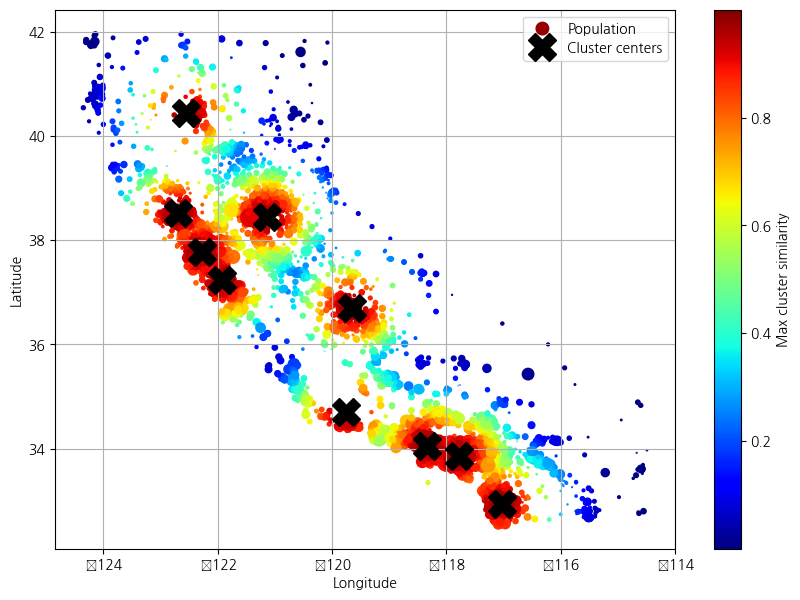

In [120]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
# save_fig("district_cluster_plot")
plt.show()

### 2.5.5 변환 파이프라인

In [121]:
# 파이프라인 구성
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

In [122]:
import sklearn
sklearn.set_config(display="diagram")   # 모든 sklearn 추정기가 인터랙티브한 다이어그램으로 표현, 파이프라인 시각화하는 데 유용
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [123]:
# 변환기 이름 짓는 게 귀찮다면 make_pipeline()
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                              StandardScaler())
num_pipeline
# pipeline 실행은 pipeline.fit()

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [124]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
print(housing_num_prepared[:2].round(2))

df_housing_num_prepared = pd.DataFrame(data=housing_num_prepared,
                                       columns=num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)
df_housing_num_prepared

[[-1.42  1.01  1.86  0.31  1.37  0.14  1.39 -0.94]
 [ 0.6  -0.7   0.91 -0.31 -0.44 -0.69 -0.37  1.17]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [125]:
# 인덱싱으로 파이프라인의 객체 반환 가능
print(num_pipeline[0])
print(num_pipeline[-1])

SimpleImputer(strategy='median')
StandardScaler()


In [130]:
print(type(housing.select_dtypes(np.number).columns))
print(housing.select_dtypes(pd.Categorical).columns)

<class 'pandas.core.indexes.base.Index'>
Index(['ocean_proximity'], dtype='object')


In [131]:
# 하나의 변환기로 각 열마다 적절한 변환 적용하는 pipeline 구성
from sklearn.compose import ColumnTransformer

# attribute define
num_attribs = housing.select_dtypes(np.number).columns.tolist()
cat_attribs = housing.select_dtypes(pd.Categorical).columns.tolist()

# pipeline define
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                              StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
# merge pipeline
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [132]:
# make_column_selecot: 주어진 타입의 모든 특성을 자동으로 선택
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [133]:
housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared)

[[-1.42303652  1.0136059   1.86111875 ...  0.          1.
   0.        ]
 [ 0.59639445 -0.702103    0.90762971 ...  0.          0.
   0.        ]
 [-1.2030985   1.27611874  0.35142777 ...  0.          0.
   0.        ]
 ...
 [ 1.25620853 -1.42870103 -1.23772062 ...  0.          0.
   1.        ]
 [ 0.58639727 -0.73960483  0.66925745 ...  0.          0.
   0.        ]
 [-1.41803793  0.94797769  1.22545939 ...  0.          0.
   1.        ]]


In [134]:
# 전체 파이프라인 구성
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]    # get_feature_names_out에 사용

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline) # 남은 특성 housing_median_age

In [135]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [136]:
housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared.shape)
print(preprocessing.get_feature_names_out())

(16512, 23)
['bedrooms__ratio' 'rooms_per_house__ratio' 'log__total_bedrooms'
 'log__total_rooms' 'log__population' 'log__households'
 'log__median_income' 'geo__클러스터 0 유사도' 'geo__클러스터 1 유사도'
 'geo__클러스터 2 유사도' 'geo__클러스터 3 유사도' 'geo__클러스터 4 유사도' 'geo__클러스터 5 유사도'
 'geo__클러스터 6 유사도' 'geo__클러스터 7 유사도' 'geo__클러스터 8 유사도' 'geo__클러스터 9 유사도'
 'cat__ocean_proximity_<1H OCEAN' 'cat__ocean_proximity_INLAND'
 'cat__ocean_proximity_ISLAND' 'cat__ocean_proximity_NEAR BAY'
 'cat__ocean_proximity_NEAR OCEAN' 'remainder__housing_median_age']
